In [1]:
import numpy as np  # for handling arrays and numerical operations
import pandas as pd  # for handling datasets
from sklearn.linear_model import LinearRegression  # for building linear regression models
from sklearn.model_selection import train_test_split  # for splitting data into training and testing sets
from sklearn.metrics import mean_squared_error, r2_score  # for evaluating model performance
import matplotlib.pyplot as plt  # for visualization purposes

In [5]:
from google.colab import files

# Upload a file from your local machine
uploaded = files.upload()

Saving 1.04. Real-life example.csv to 1.04. Real-life example.csv


In [75]:
# Access the file by its file path
file_path = "1.04. Real-life example.csv"
df = pd.read_csv(file_path)

In [76]:
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [77]:
df.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


# Explore data

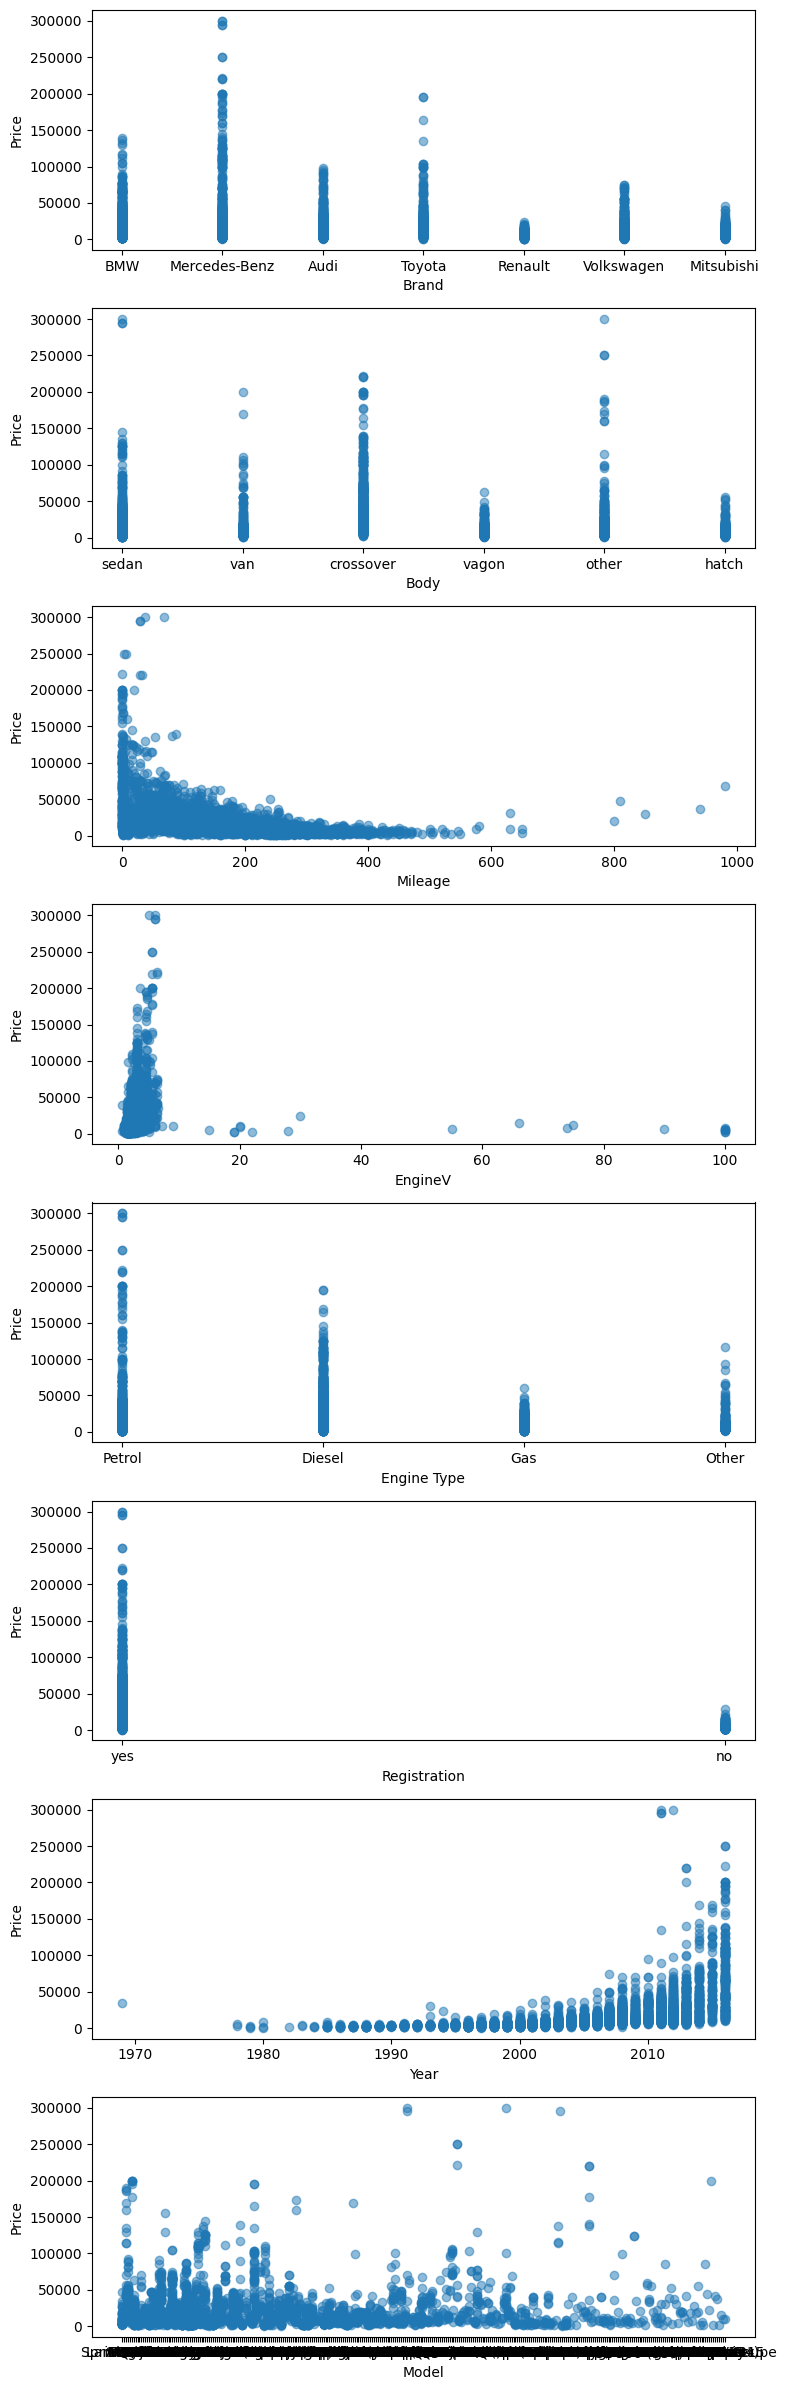

In [78]:
# Extract target variable and other variables
target = 'Price'
variables = [col for col in df.columns if col != target]

# Create scatter plot matrix
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(8, 24))
for i, var in enumerate(variables):
    ax = axes[i]
    ax.scatter(df[var], df[target], alpha=0.5)
    ax.set_xlabel(var)
    ax.set_ylabel(target)

plt.tight_layout()
plt.show()

# Pre_Processing

In [79]:
# remove the 'model' column
df = df.drop('Model', axis=1)


In [80]:
df.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [81]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [82]:
# calculate the median price
median_price = df['Price'].median()

# impute the missing prices with the median value
df['Price'] = df['Price'].fillna(median_price)


In [83]:
# calculate the mode of EngineV
mode_EngineV = df['EngineV'].value_counts().index[0]

# impute the missing values with the mode value
df['EngineV'] = df['EngineV'].fillna(mode_EngineV)

<ipython-input-84-1dfa5dfc71ee>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

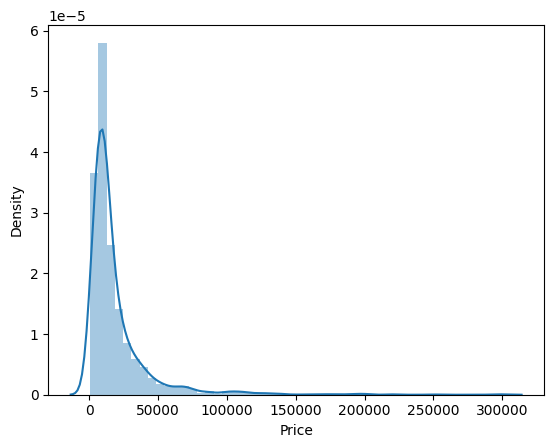

In [84]:
# Explore distrbution of plot
import seaborn as sns
sns.distplot(df['Price'])


# Dealing with outliers

In [85]:
# calculate the 99th percentile value of the price column
threshold = df['Price'].quantile(0.99)

# select only the rows with price values below the threshold
df = df[df['Price'] < threshold]

In [86]:
# calculate the 99th percentile value of the Mileage column
threshold = df['Mileage'].quantile(0.99)

# select only the rows with Mileage values below the threshold
df = df[df['Mileage'] < threshold]

<ipython-input-87-8e2426d7349b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

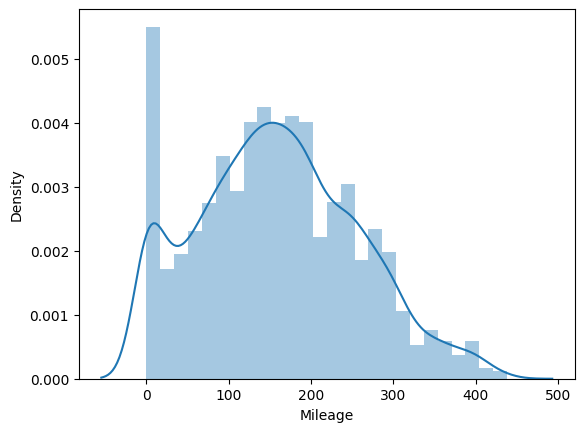

In [87]:
# Explore distrbution of plot
import seaborn as sns
sns.distplot(df['Mileage'])


In [88]:
# apply a logarithmic transformation to the EngineV column
df['EngineV_log'] = np.log(df['EngineV'])

<ipython-input-89-1e82484e68a0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EngineV_log'])


<Axes: xlabel='EngineV_log', ylabel='Density'>

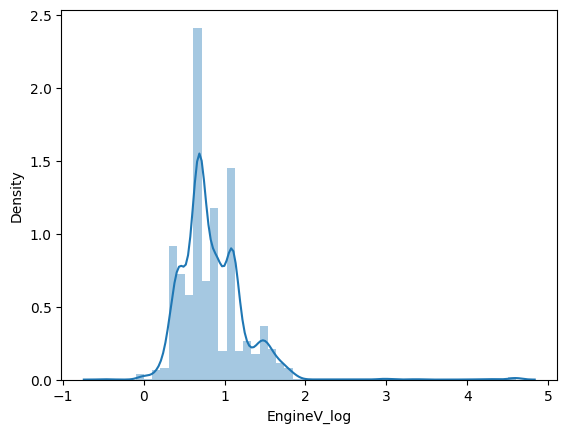

In [89]:
# Explore distrbution of plot
import seaborn as sns
sns.distplot(df['EngineV_log'])

<ipython-input-90-d00f946aced1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Year'])


<Axes: xlabel='Year', ylabel='Density'>

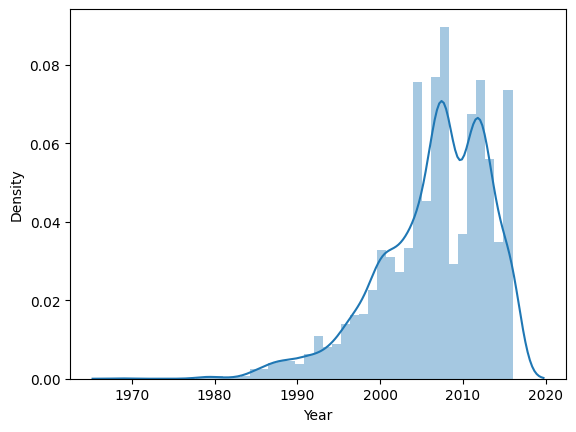

In [90]:
# Explore distrbution of plot
import seaborn as sns
sns.distplot(df['Year'])

In [91]:
# calculate the 0.01 quantile value of the year column
threshold = df['Year'].quantile(0.01)

# select only the rows with year values greater than or equal to the threshold
df = df[df['Year'] >= threshold]

In [92]:
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,EngineV_log
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,0.693147
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,1.064711
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,1.609438
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,1.435085
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,0.693147
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,0.916291
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,0.470004
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,1.252763
4343,Toyota,14200.0,sedan,31,2.0,Petrol,yes,2014,0.693147


In [93]:
df = df.reset_index(drop = True)

In [94]:
df.describe()

,Price,Mileage,EngineV,Year,EngineV_log
count,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000
mean,17562.111912,158.534994,2.754698,2006.756584,0.849067
std,18223.754418,96.987929,5.050047,6.277824,0.408881
min,800.000000,0.000000,0.600000,1987.000000,-0.510826
25%,7200.000000,88.000000,1.900000,2003.000000,0.641854
50%,11500.000000,155.000000,2.200000,2008.000000,0.788457
75%,20500.000000,225.000000,3.000000,2012.000000,1.098612
max,124999.000000,438.000000,99.990000,2016.000000,4.605070


In [95]:
# apply a logarithmic transformation to the price column
df['price_log'] = np.log(df['Price'])



<ipython-input-96-ae7ba6386d16>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_log'])


<Axes: xlabel='price_log', ylabel='Density'>

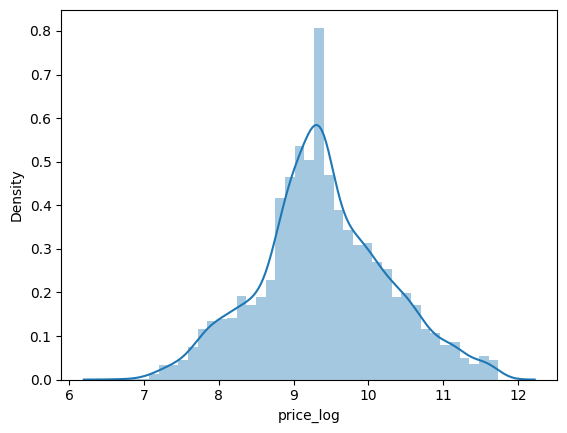

In [96]:
# Explore distrbution of plot
import seaborn as sns
sns.distplot(df['price_log'])


**EDA With price log**

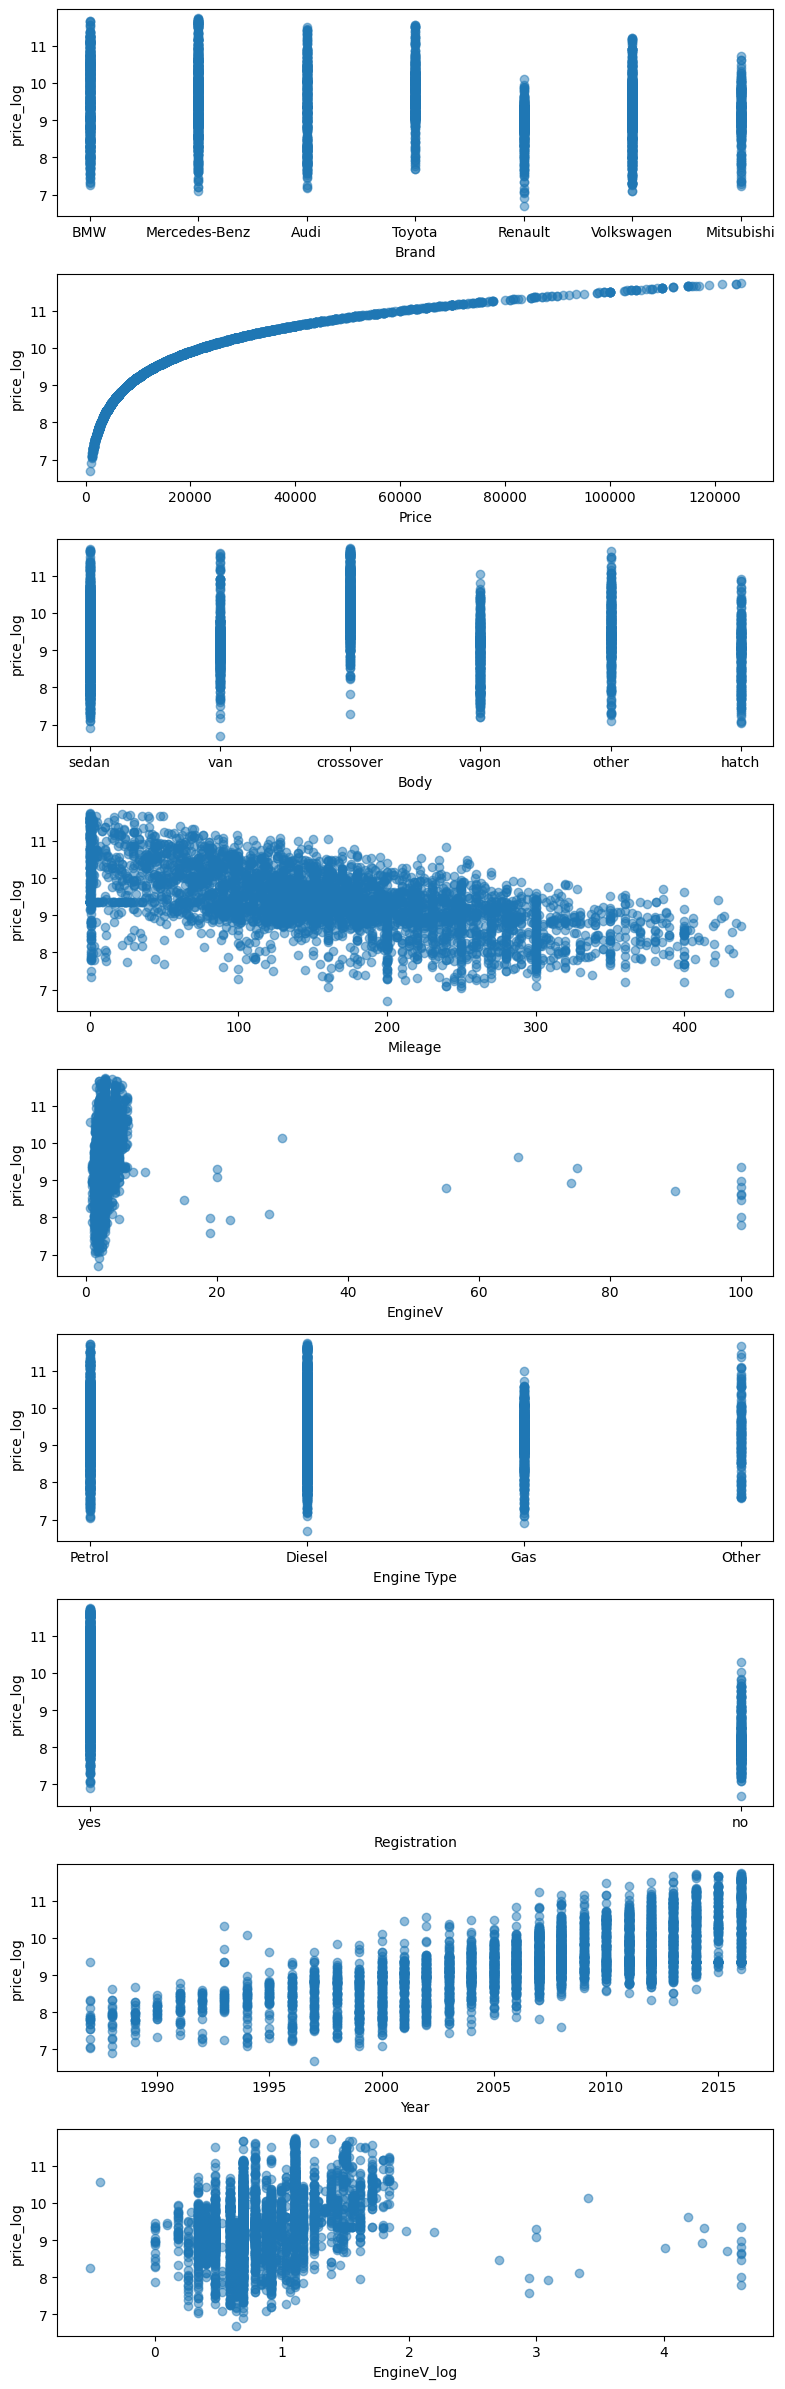

In [97]:
# Extract target variable and other variables
target = 'price_log'
variables = [col for col in df.columns if col != target]

# Create scatter plot matrix
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(8, 24))
for i, var in enumerate(variables):
    ax = axes[i]
    ax.scatter(df[var], df[target], alpha=0.5)
    ax.set_xlabel(var)
    ax.set_ylabel(target)

plt.tight_layout()
plt.show()

In [98]:
# drop the price column from the dataframe
df = df.drop('Price', axis=1)

In [99]:
df.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'EngineV_log', 'price_log'],
      dtype='object')

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = df[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['Vif'] = [variance_inflation_factor(variable.values, i) for i in range(variable.shape[1])]
vif["features"] = variable.columns

In [101]:
vif

,Vif,features
0,3.649320,Mileage
1,3.887834,Year
2,1.298850,EngineV


**Not remove anything because there's any value more than 5**

In [102]:
df

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,EngineV_log,price_log
0,BMW,sedan,277,2.0,Petrol,yes,1991,0.693147,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,1.064711,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,1.609438,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,1.435085,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,0.693147,9.814656
...,...,...,...,...,...,...,...,...,...
4210,Volkswagen,van,163,2.5,Diesel,yes,2008,0.916291,9.350102
4211,Toyota,sedan,35,1.6,Petrol,yes,2014,0.470004,9.792556
4212,BMW,sedan,1,3.5,Petrol,yes,1999,1.252763,8.779557
4213,Toyota,sedan,31,2.0,Petrol,yes,2014,0.693147,9.560997


#ُُEncoding Categorical variable

In [103]:
# # count the unique values in the "Brand" column
# df['Brand'].value_counts()

In [104]:
# perform one-hot encoding for the "brand" column
one_hot = pd.get_dummies(df['Brand'], prefix='Brand')

# concatenate the one-hot encoded columns with the original dataframe
df = pd.concat([df, one_hot], axis=1)

# # drop the original "brand" column
df = df.drop('Brand', axis=1)

In [105]:
# count the unique values in the "Brand" column
df['Body'].value_counts()

sedan        1595
crossover     874
van           661
other         409
vagon         398
hatch         278
Name: Body, dtype: int64

In [106]:
# perform one-hot encoding for the "brand" column
one_hot = pd.get_dummies(df['Body'], prefix='Body')

# concatenate the one-hot encoded columns with the original dataframe
df = pd.concat([df, one_hot], axis=1)

# # drop the original "brand" column
df = df.drop('Body', axis=1)

In [107]:
# count the unique values in the "Brand" column
df['Engine Type'].value_counts()

Diesel    1965
Petrol    1499
Gas        599
Other      152
Name: Engine Type, dtype: int64

In [108]:
# perform one-hot encoding for the "brand" column
one_hot = pd.get_dummies(df['Engine Type'], prefix='Engine Type')

# concatenate the one-hot encoded columns with the original dataframe
df = pd.concat([df, one_hot], axis=1)

# # drop the original "brand" column
df = df.drop('Engine Type', axis=1)

In [109]:
# perform binary encoding for the "registration" column
df['Registration'] = df['Registration'].replace({'yes': 1, 'no': 0})


In [110]:
# use the Year column as a categorical variable
year_dummies = pd.get_dummies(df['Year'], prefix='year')

# concatenate the dummy variables with the original dataframe
df = pd.concat([df, year_dummies], axis=1)

# drop the original Year column
df = df.drop('Year', axis=1)

In [111]:
df.columns

Index(['Mileage', 'EngineV', 'Registration', 'EngineV_log', 'price_log',
       'Brand_Audi', 'Brand_BMW', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi',
       'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'year_1987', 'year_1988', 'year_1989',
       'year_1990', 'year_1991', 'year_1992', 'year_1993', 'year_1994',
       'year_1995', 'year_1996', 'year_1997', 'year_1998', 'year_1999',
       'year_2000', 'year_2001', 'year_2002', 'year_2003', 'year_2004',
       'year_2005', 'year_2006', 'year_2007', 'year_2008', 'year_2009',
       'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014',
       'year_2015', 'year_2016'],
      dtype='object')

In [112]:
# remove the "EngineV" and "Price" variables from the dataframe
df = df.drop(['EngineV'], axis=1)

In [113]:
from sklearn.preprocessing import StandardScaler
# separate the input and target variables
X = df.drop('price_log', axis=1)
y = df['price_log']

# scale the continuous variables in the input dataframe
scaler = StandardScaler()
X[['Mileage', 'EngineV_log']] = scaler.fit_transform(X[['Mileage', 'EngineV_log']])

# print the resulting dataframes
print("Input DataFrame:\n", X)
print("\nTarget DataFrame:\n", y)

Input DataFrame:
        Mileage  Registration  EngineV_log  Brand_Audi  Brand_BMW  \
0     1.221586             1    -0.381378           0          1   
1     2.768353             1     0.527462           0          0   
2     2.056840             1     1.859860           0          0   
3     0.840050             1     1.433393           1          0   
4    -0.397365             1    -0.381378           0          0   
...        ...           ...          ...         ...        ...   
4210  0.046042             1     0.164429           0          0   
4211 -1.273866             1    -0.927185           0          0   
4212 -1.624467             1     0.987436           0          1   
4213 -1.315113             1    -0.381378           0          0   
4214 -0.356117             1    -0.381378           0          0   

      Brand_Mercedes-Benz  Brand_Mitsubishi  Brand_Renault  Brand_Toyota  \
0                       0                 0              0             0   
1            

In [114]:
from sklearn.model_selection import train_test_split

# Assume that X and y are input and target variables, respectively.
# Split the dataset into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model object.
lr_model = LinearRegression()

# Fit the model to the training data.
lr_model.fit(X_train, y_train)


LinearRegression()

In [116]:
y_hat = lr_model.predict(X_train)


<ipython-input-117-371848603a43>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residual Pdf')

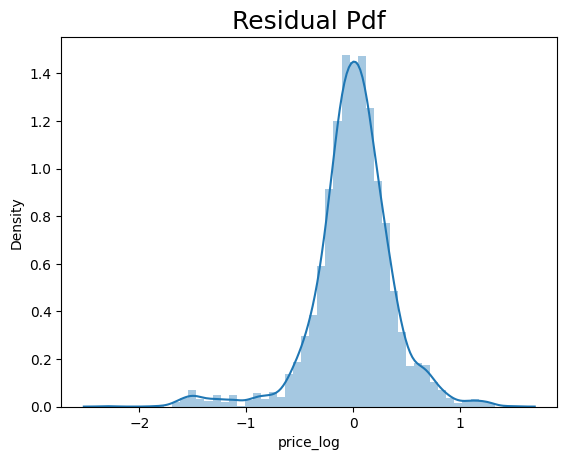

In [117]:
sns.distplot(y_train - y_hat)
plt.title("Residual Pdf", size = 18)

In [118]:
lr_model.score(X_train, y_train)

0.8104576704915634

#Finding the weights and bias

In [119]:
lr_model.intercept_

-2042748809135.781

In [120]:
lr_model.coef_

array([-6.45151187e-02,  8.43644517e-01,  1.39862724e-01,  3.61481833e+11,
        3.61481833e+11,  3.61481833e+11,  3.61481833e+11,  3.61481833e+11,
        3.61481833e+11,  3.61481833e+11,  5.51770355e+11,  5.51770355e+11,
        5.51770355e+11,  5.51770355e+11,  5.51770355e+11,  5.51770355e+11,
        1.05339227e+12,  1.05339227e+12,  1.05339227e+12,  1.05339227e+12,
        7.61043520e+10,  7.61043520e+10,  7.61043520e+10,  7.61043520e+10,
        7.61043520e+10,  7.61043520e+10,  7.61043520e+10,  7.61043520e+10,
        7.61043520e+10,  7.61043520e+10,  7.61043520e+10,  7.61043520e+10,
        7.61043520e+10,  7.61043520e+10,  7.61043520e+10,  7.61043520e+10,
        7.61043520e+10,  7.61043520e+10,  7.61043520e+10,  7.61043520e+10,
        7.61043520e+10,  7.61043520e+10,  7.61043520e+10,  7.61043520e+10,
        7.61043520e+10,  7.61043520e+10,  7.61043520e+10,  7.61043520e+10,
        7.61043520e+10,  7.61043520e+10])

In [121]:
# Predict the target variable for the test data.
y_pred = lr_model.predict(X_test)

In [122]:
y_pred

array([ 9.56030273,  9.60302734, 10.31689453,  9.42089844,  9.17163086,
        8.98657227,  9.20776367,  9.44726562,  9.16455078,  7.75244141,
        9.71948242,  8.50585938, 10.22753906,  9.32788086,  9.8527832 ,
       10.82495117,  9.21337891,  9.56274414,  9.47094727,  9.38867188,
        7.62182617,  9.24731445,  8.82788086,  9.53759766,  9.07177734,
        8.6171875 ,  9.07104492,  9.06884766,  9.35107422,  8.8737793 ,
        9.89575195,  8.3840332 ,  8.13354492,  8.98706055,  9.22192383,
       10.50097656,  7.98144531,  8.71777344, 10.09936523, 10.15673828,
        9.44189453,  9.63598633,  9.8737793 ,  9.77612305, 10.47167969,
        8.70410156,  9.67602539,  8.6081543 ,  9.45776367, 10.58349609,
        8.89526367,  9.79760742,  9.35766602,  9.33935547,  8.01342773,
       10.91625977,  8.71289062,  9.55859375,  9.62939453, 10.58886719,
        8.16357422,  9.41723633,  9.45703125,  8.48901367,  9.39550781,
        9.41552734,  8.70458984,  9.24511719,  9.90942383,  9.31

In [123]:
from sklearn.metrics import r2_score

# Get the R-squared score for the model.
r2_score = r2_score(y_test, y_pred)

# Print the R-squared score.
print("R-squared score:", r2_score)

R-squared score: 0.787391970279113


In [124]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# separate the input and target variables
X = df.drop('price_log', axis=1)
y = df['price_log']

# create a pipeline of preprocessing steps and a linear regression model
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('reg', Ridge())
])

# define the hyperparameter grid for the Ridge regression model
param_grid = {'reg__alpha': [0.001, 0.01, 0.1, 1, 10]}

# perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X, y)

# get the best hyperparameters and fit the model to the data
best_alpha = grid_search.best_params_['reg__alpha']
pipe.set_params(reg__alpha=best_alpha)
pipe.fit(X, y)

# make predictions on the test data
y_pred = pipe.predict(X)

# calculate the R-squared score for the model
r2 = r2_score(y, y_pred)

# print the R-squared score to the console
print("R-squared score:", r2)

R-squared score: 0.8634110024580792


10